## How to predict heart disease well by given dataset

## 1. Introduction

**Background Information**  

Heart disease is a common disease all over the world. If there is a model that can predict the probability of people having heart disease in the future by some features, it can help people make better prevention of heart disease.

However, there are lots of features will make effects on the predict of the heart disease. For example, some scientists claim that the risk of having heart disease is related to sex (Roeters et al., 2002). Furthermore, age also will affect the risk of having heart disease (Navas-Nacher et al., 2001). Law, Wald, and Thompson claimed that serum cholestoral affects the risk of heart disease in 1994. Resting electrocardiographic also is a good way to predict heart disease (Sox et al., 1989). 

Therefore, this project is aimed to find which features pay more important roles in predicting heart disease.

**The Question**  

The aim of this project is trying to answer the question how to predict heart disease well by given dataset.

**The Dataset**

In this project, the dataset about heart disease in cleve land is from the UCI will be used which includes 14 attributes   
age-Age    
sex-Sex  
cp-chest pain type  
trestbps - Resting blood pressure  
chol - Serum cholestoral  
fbs - Fasting blood sugar  
restecg - Resting electrocardiographic results  
thalach - Maximum heart rate achieved  
exang - Exercise-induced angina  
oldpeak - ST depression induced by exercise relative to rest  
slope - The slope of the peak exercise ST segment   
ca - Number of major vessels (0-3) colored by flourosopy  
thal - 3 = normal; 6 = fixed defect; 7 = reversible defect  
num - For Heart Disease: Presence or Absence.  

## 2. Methods & Results

**Install Packages**  

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
library(RColorBrewer)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

**Read the data into the R, add column names for each column, and rename the num to make it more readability.** 

In [59]:
download.file("https://raw.githubusercontent.com/UBC-DSCI/dsci-100-project_template/main/data/heart_disease/processed.cleveland.data",
              "data/processed_cleveland.csv")
data <- read_csv("data/processed_cleveland.csv", col_names = FALSE)|>
    rename(age = X1,
           sex = X2,
           cp = X3,
           trestbps = X4,
           chol = X5,
           fbs = X6,
           restecg = X7,
           thalach = X8,
           exang = X9,
           oldpeak = X10,
           slope = X11,
           ca = X12,
           thal = X13,
           num = X14) |>
    mutate(num = as_factor(num)) |>
    mutate(num = fct_recode(num, "A" = "0", "P" = "1", "P" = "2", "P" = "3", "P" = "4"))
data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,A
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,P
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,P
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,P
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,P
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,A


**Clean and wrangle the data into a tidy formats**  

This project aims to explore how to predict heart disease based on the given dataset. Due to the original data has some missing values, the first step is deleting those rows which includes missing data. Furthermore, in the original dataset, the type ca and thal are character, which cannot to be used in the follwing steps. Therefore, the type of ca and that should be changed to numerical.

In [97]:
tidy_data <- data |>
    filter (age != "?" &
           sex != "?" & 
           cp != "?" & 
           trestbps != "?" & 
           chol != "?" & 
           fbs != "?" & 
           restecg != "?" & 
           thalach != "?" & 
           exang != "?" & 
           oldpeak != "?" & 
           slope != "?" & 
           ca != "?" & 
           thal != "?" & 
           num != "?") |>
    mutate (tidy_data, 
            ca = as.numeric (ca),
            thal = as.numeric (thal))
tidy_data 

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,A
67,1,4,160,286,0,2,108,1,1.5,2,3,3,P
67,1,4,120,229,0,2,129,1,2.6,2,2,7,P
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2,7,P
57,1,4,130,131,0,0,115,1,1.2,2,1,7,P
57,0,2,130,236,0,2,174,0,0.0,2,1,3,P


**Split the data to training dataset and testing dataset.**  

Now, we need to split the whole dataset to training dataset and testing dataset to help us training the model and testing the model in following steps. Furthermore, to make the analysis reproducible, we need to add the seed at here to make sure everytime when we run the folling code cell, we can get the same training dataset and the testing dataset.

In [98]:
set.seed(612)
data_split <- initial_split(tidy_data, prop = 0.75, strata = num)  
data_train <- training(data_split)   
data_test <- testing(data_split)
data_train
data_test

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,A
37,1,3,130,250,0,0,187,0,3.5,3,0,3,A
41,0,2,130,204,0,2,172,0,1.4,1,0,3,A
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2,7,P
57,1,4,130,131,0,0,115,1,1.2,2,1,7,P
57,0,2,130,236,0,2,174,0,0.0,2,1,3,P


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
57,0,4,120,354,0,0,163,1,0.6,1,0,3,A
56,0,2,140,294,0,2,153,0,1.3,2,0,3,A
52,1,3,172,199,1,0,162,0,0.5,1,0,7,A
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
67,1,3,152,212,0,2,150,0,0.8,2,0,7,P
44,1,4,120,169,0,0,144,1,2.8,3,0,6,P
45,1,1,110,264,0,0,132,0,1.2,2,0,7,P


**Summarize the training data in tables.**  

The summary of the data which  is numerical data.

In [99]:
data_train |>
    summarize (
        total_observations = nrow(data_train),
        average_age = sum(age)/nrow(data_train),
        max_trestbps = max(trestbps),
        min_trestbps = min (trestbps),
        average_trestbps = sum(trestbps) / nrow(data_train), 
        max_chol = max(chol),
        min_chol = min (chol),
        average_chol = sum(chol) / nrow(data_train),
        max_thalach = max(thalach),
        min_thalach = min (thalach),
        average_thalach = sum(thalach) / nrow(data_train),
        max_oldpeak = max(oldpeak),
        min_oldpeak = min (oldpeak),
        average_oldpeak = sum(oldpeak) / nrow(data_train))

total_observations,average_age,max_trestbps,min_trestbps,average_trestbps,max_chol,min_chol,average_chol,max_thalach,min_thalach,average_thalach,max_oldpeak,min_oldpeak,average_oldpeak
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
222,55.17568,192,94,132.2387,417,126,246.6802,202,71,148.6847,6.2,0,1.045946


The summary of the sex to show the proportion of having heart diseases in different sexs.

In [100]:
data_train |>
  group_by(sex, num) |>
  summarize(
    percentage = n() / nrow(data_train) * 100)

`summarise()` has grouped output by 'sex'. You can override using the `.groups`
argument.


sex,num,percentage
<dbl>,<fct>,<dbl>
0,A,22.522523
0,P,9.459459
1,A,31.531532
1,P,36.486486


The summary of the chest pain type to show the relationship between the chest pain type and the probability of having heart disease.

In [101]:
data_train |>
  group_by(cp, num) |>
  summarize(
    percentage = n() / nrow(data_train) * 100)

`summarise()` has grouped output by 'cp'. You can override using the `.groups`
argument.


cp,num,percentage
<dbl>,<fct>,<dbl>
1,A,4.954955
1,P,1.351351
2,A,13.063063
⋮,⋮,⋮
3,P,5.405405
4,A,15.315315
4,P,36.036036


The summary of the fasting blood sugar to show the relationship between the whether fasting blood sugar higher than 120 mg/dl (1) or not (0) and the probability of having heart disease.

In [102]:
data_train |>
  group_by(fbs, num) |>
  summarize(
    percentage = n() / nrow(data_train) * 100)

`summarise()` has grouped output by 'fbs'. You can override using the `.groups`
argument.


fbs,num,percentage
<dbl>,<fct>,<dbl>
0,A,45.945946
0,P,39.639640
1,A,8.108108
1,P,6.306306


The summary of the resting electroardiographic results to show the relationship between the type of that and the probability of having heart disease.

In [104]:
data_train |>
  group_by(restecg) |>
  summarize(
    count = n(),
    percentage = n() / nrow(data_train) * 100)

restecg,count,percentage
<dbl>,<int>,<dbl>
0,102,45.9459459
1,2,0.9009009
2,118,53.1531532


The summary of the exercise including angina results to show the relationship between that and the probability of having heart disease.

In [105]:
data_train |>
  group_by(exang) |>
  summarize(
    count = n(),
    percentage = n() / nrow(data_train) * 100)

exang,count,percentage
<dbl>,<int>,<dbl>
0,146,65.76577
1,76,34.23423


The summary of the slope of peak exercise ST segment results to show the relationship between that and the probability of having heart disease.

In [106]:
data_train |>
  group_by(slope) |>
  summarize(
    count = n(),
    percentage = n() / nrow(data_train) * 100)

slope,count,percentage
<dbl>,<int>,<dbl>
1,109,49.099099
2,99,44.594595
3,14,6.306306


The summary of the number of major vessels to show the relationship between that and the probability of having heart disease.

In [107]:
data_train |>
  group_by(ca) |>
  summarize(
    count = n(),
    percentage = n() / nrow(data_train) * 100)

ca,count,percentage
<dbl>,<int>,<dbl>
0,127,57.207207
1,48,21.621622
2,32,14.414414
3,15,6.756757


The summary of the thal to show the relationship between that and the probability of having heart disease.

In [108]:
data_train |>
  group_by(thal) |>
  summarize(
    count = n(),
    percentage = n() / nrow(data_train) * 100)

thal,count,percentage
<dbl>,<int>,<dbl>
3,125,56.306306
6,13,5.855856
7,84,37.837838


**Visualize the training data** 

In the following graph, the graph shows the replationship between the people having heart disease or not and the age and serum cholestoral.

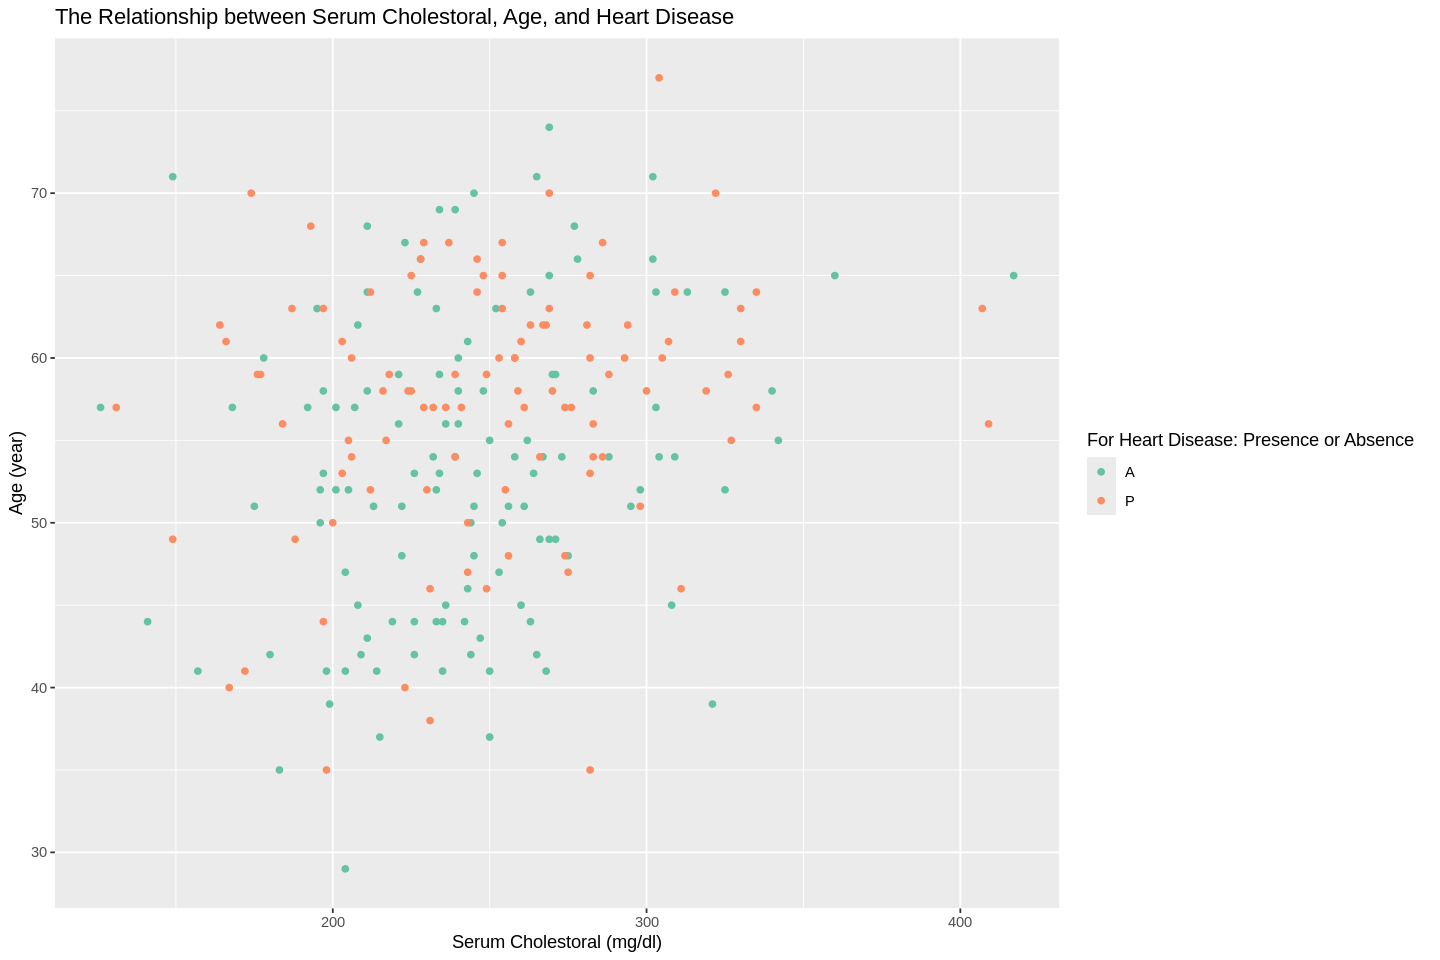

In [109]:
age_chol_heart <- data_train |>
    ggplot(aes(x = chol, y =  age)) + 
        geom_point(aes(colour = num)) + 
        labs (x = "Serum Cholestoral (mg/dl)", y = "Age (year)", colour = "For Heart Disease: Presence or Absence") + 
        ggtitle("The Relationship between Serum Cholestoral, Age, and Heart Disease") +
        scale_color_brewer(palette = "Set2") 
options(repr.plot.width = 12, repr.plot.height = 8)
age_chol_heart

The following graph shows the spread of resting blood pressure of people in the training dataset.

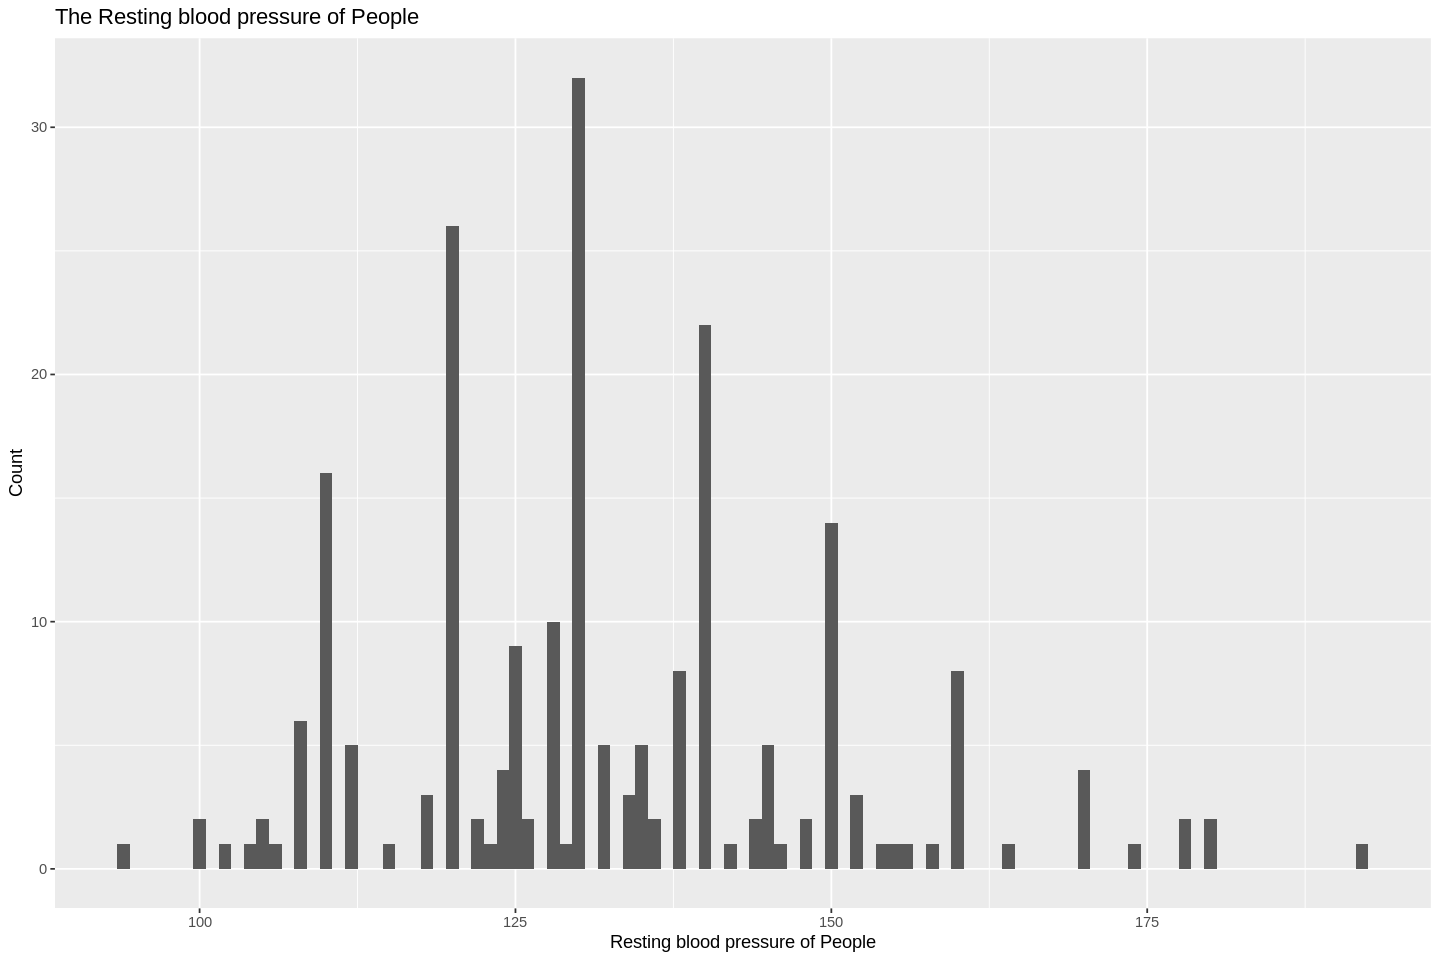

In [110]:
trestbps_heart <- data_train |>
    ggplot(aes(x = trestbps)) + 
        geom_histogram(binwidth = 1) + 
        labs (x = "Resting blood pressure of People", y = "Count") + 
        ggtitle("The Resting blood pressure of People") 
trestbps_heart

The following graph shows the proportion of people have heart disease or not based on different sexs.

`summarise()` has grouped output by 'sex'. You can override using the `.groups`
argument.


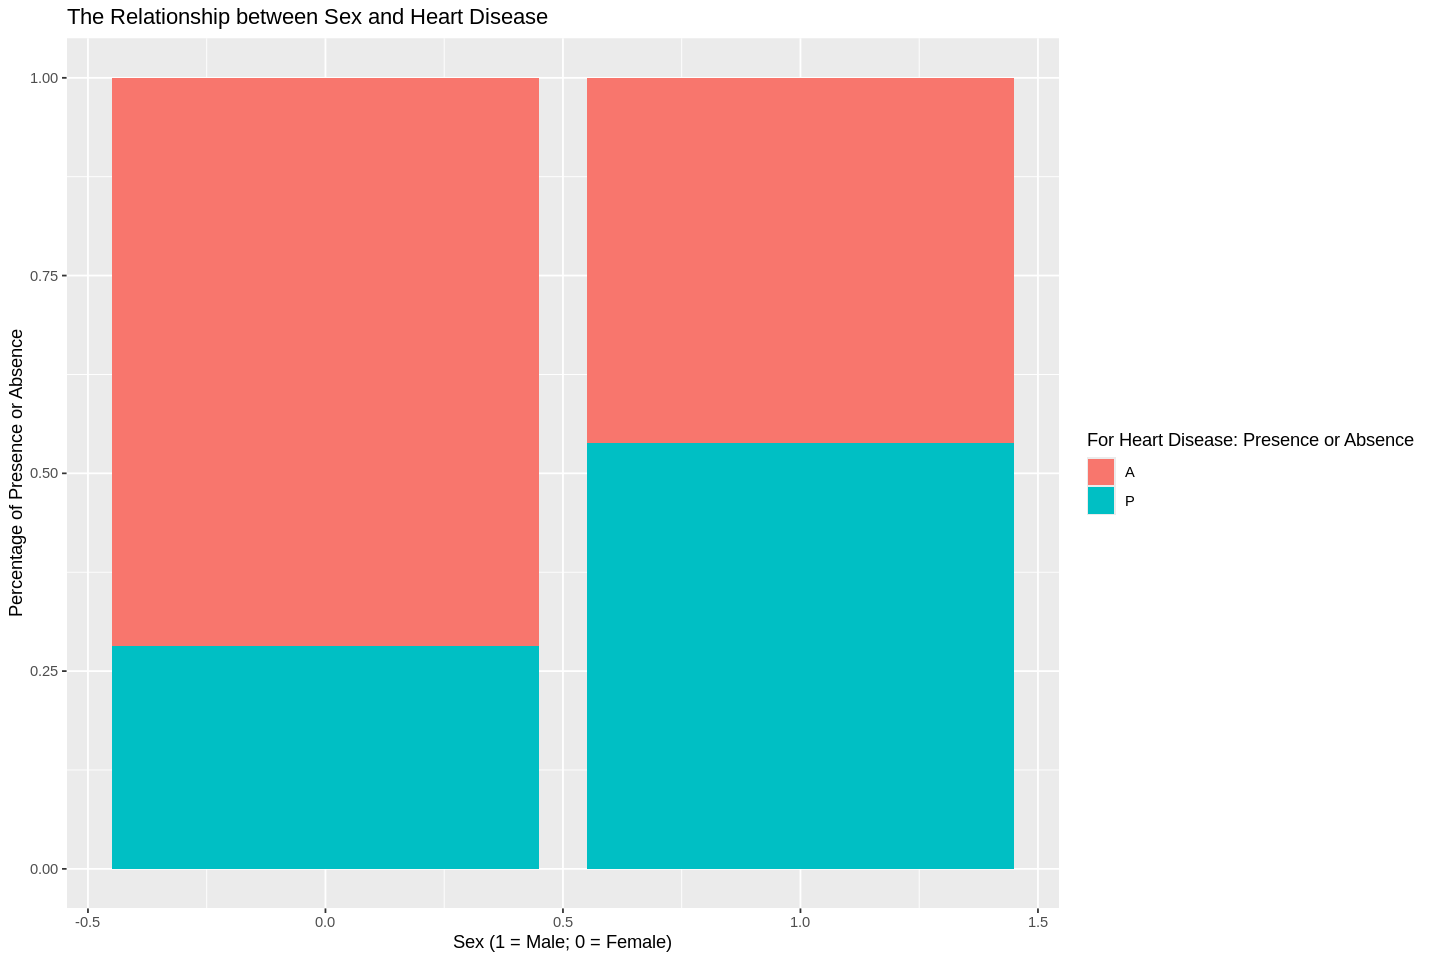

In [12]:
sex <- data_train |>
  group_by(sex, num) |>
  summarize(
    percentage = n() / nrow(data_train) * 100)
sex_count_plot <- ggplot(sex, aes(x = sex, y = percentage, fill = num)) + 
    geom_bar(stat = "identity", position = "fill") + 
    xlab("Sex (1 = Male; 0 = Female)") +
    ylab("Percentage of Presence or Absence") +
   labs(fill = "For Heart Disease: Presence or Absence") +
   ggtitle("The Relationship between Sex and Heart Disease") +
   scale_color_brewer(palette = "Set2") 
sex_count_plot

The following graph shows the proportion of people having heart disease or not based on 3 different types of resting electrocardiographic.

`summarise()` has grouped output by 'restecg'. You can override using the
`.groups` argument.


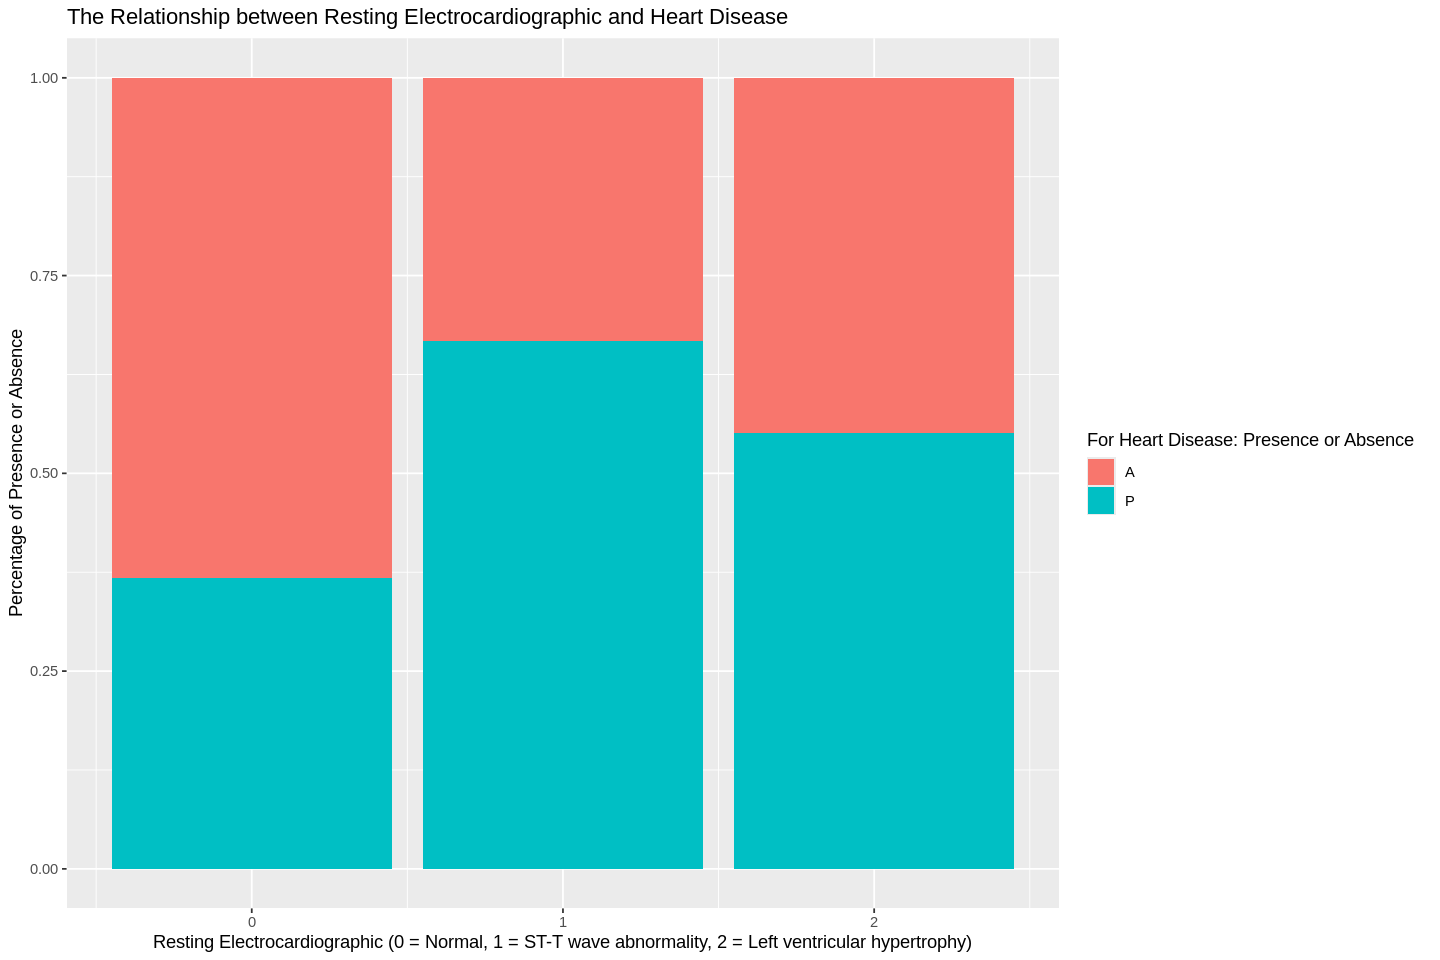

In [13]:
restecg <- data_train |>
  group_by(restecg, num) |>
  summarize(
    percentage = n() / nrow(data_train) * 100)
restecg_count_plot <- ggplot(restecg, aes(x = restecg, y = percentage, fill = num)) + 
    geom_bar(stat = "identity", position = "fill") + 
    xlab("Resting Electrocardiographic (0 = Normal, 1 = ST-T wave abnormality, 2 = Left ventricular hypertrophy)") +
    ylab("Percentage of Presence or Absence") +
   labs(fill = "For Heart Disease: Presence or Absence") +
   ggtitle("The Relationship between Resting Electrocardiographic and Heart Disease") +
   scale_color_brewer(palette = "Set2") 
restecg_count_plot

**Data Analysis** 

Following code cells are trying to find the best K value and the features in this dataset to help predict heart disease better based on KNN classification model.

The purpose of the following code cell is finding the best K value for this dataset to use the KNN classification model.

[1] 29

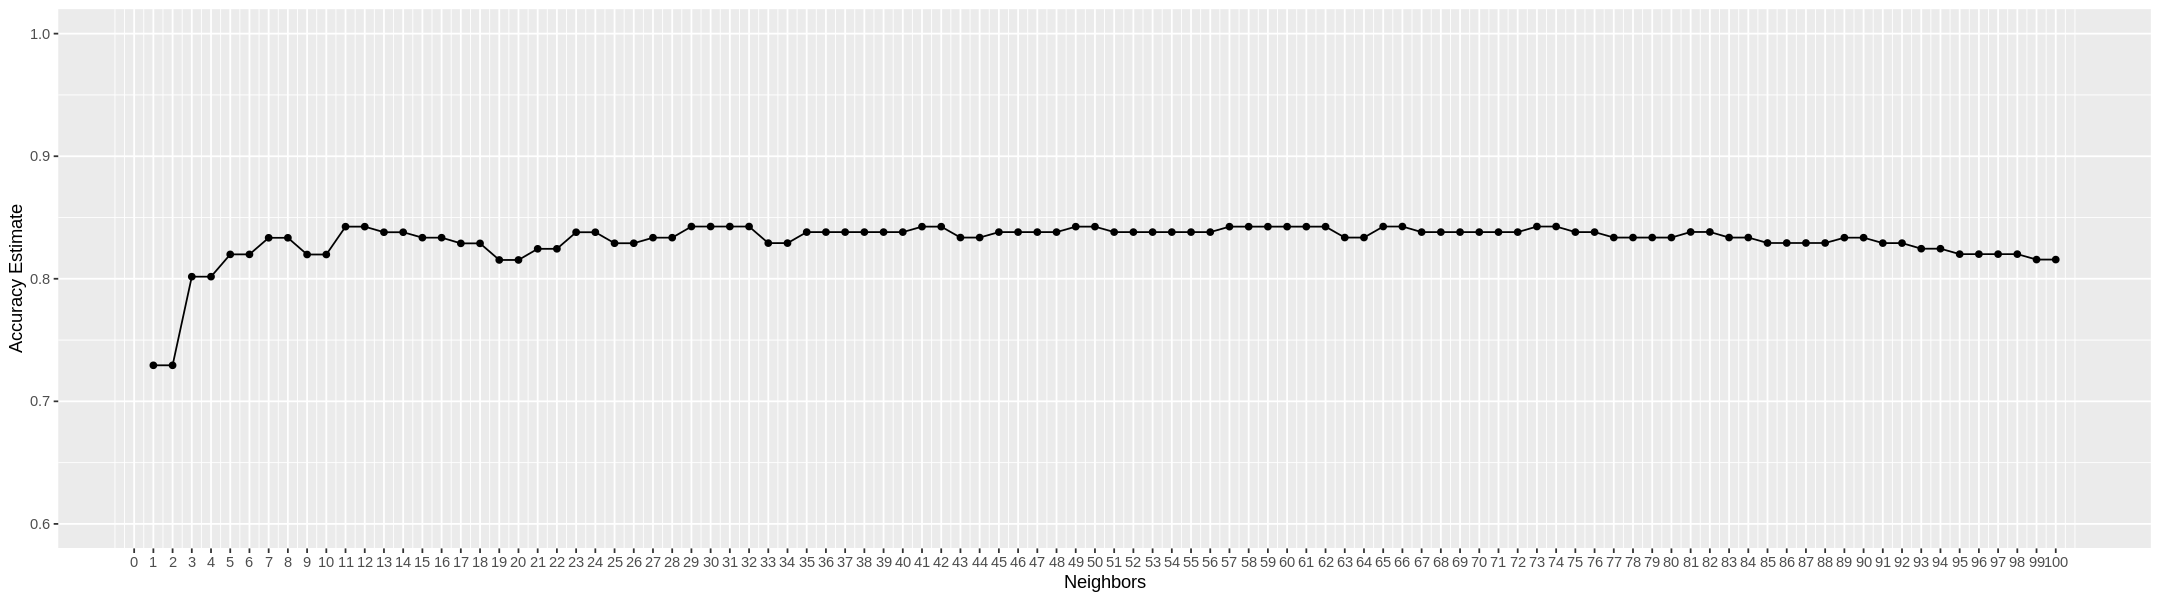

In [111]:
heart_recipe <- recipe(num ~ ., data = data_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune ()) |>
       set_engine("kknn") |>
       set_mode("classification")

heart_vfold <- vfold_cv(data_train, v = 5, strata = num)

vals <- tibble (neighbors = c (seq(1, 100)))

knn_results <- workflow() |>
       add_recipe(heart_recipe) |>
       add_model(knn_tune) |>
       tune_grid(resamples = heart_vfold, grid = vals) |>
       collect_metrics()

accuracies <- knn_results |> 
       filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 100, by = 1)) +  # adjusting the x-axis
       scale_y_continuous(limits = c(0.6, 1.0)) # adjusting the y-axis
options(repr.plot.width = 18, repr.plot.height = 5)
cross_val_plot
k_best <- accuracies |>
    arrange (desc (mean)) |>
    head (1) |>
    pull (neighbors)
k_best

The following code cell is aimed to putting the best K values to the model, and then fit the model which will take all features provided in this dataset to predict heart diseases by training dataset. Before creating the confusion matrix of this model.

In [112]:
heart_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_best) |>
       set_engine("kknn") |>
       set_mode("classification")

heart_fit <- workflow() |>
       add_recipe(heart_recipe) |>
       add_model(heart_best_spec) |>
       fit(data = data_train)

heart_predictions <- predict(heart_fit , data_test) |>
       bind_cols(data_test)

heart_metrics <-  heart_predictions|>
    metrics(truth = num, estimate = .pred_class) |>
    filter(.metric == "accuracy")

heart_mat <- heart_predictions |> 
       conf_mat(truth = num, estimate = .pred_class)
heart_mat

          Truth
Prediction  A  P
         A 39 12
         P  1 23

Feature Selection

The following code is aimed to find the accuracy of the model by using different features to predict heart disease.

In [113]:
names <- names(data_train)
# create an empty tibble to store the results
accuracies <- tibble(size = integer(),
                     model_string = character(),
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

# create a 5-fold cross-validation object
cancer_vfold <- vfold_cv(data_train, v = 5, strata = num)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("num", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        cancer_recipe <- recipe(as.formula(model_string),
                                data = data_train) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the K-NN classifier with these predictors,
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(cancer_recipe) |>
          add_model(knn_spec) |>
          tune_grid(resamples = cancer_vfold, grid = k_best) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |>
      add_row(size = i,
              model_string = models[[jstar]],
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,num ~ oldpeak,0.7025253
2,num ~ oldpeak+thal,0.7925253
3,num ~ oldpeak+thal+ca,0.8197980
⋮,⋮,⋮
12,num ~ oldpeak+thal+ca+thalach+sex+fbs+num+cp+exang+restecg+slope+trestbps,0.8425253
13,num ~ oldpeak+thal+ca+thalach+sex+fbs+num+cp+exang+restecg+slope+trestbps+age,0.8290909
14,num ~ oldpeak+thal+ca+thalach+sex+fbs+num+cp+exang+restecg+slope+trestbps+age+chol,0.8198990


In the following code cell, the feature groups used to predict heart disease will be sorted with the decreasing order of the accuracy.
Then the feature group in the first row will be the best feature group used in this dataset to predict the heart disease.

In [114]:
accuracies <- accuracies |>
    arrange(desc(accuracy))
accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
6,num ~ oldpeak+thal+ca+thalach+sex+fbs,0.8563636
7,num ~ oldpeak+thal+ca+thalach+sex+fbs+num,0.8563636
10,num ~ oldpeak+thal+ca+thalach+sex+fbs+num+cp+exang+restecg,0.8559596
⋮,⋮,⋮
3,num ~ oldpeak+thal+ca,0.8197980
2,num ~ oldpeak+thal,0.7925253
1,num ~ oldpeak,0.7025253


Based on above table, for this dataset, the best feature group to predict heart disease is not all features. Therefore, in the following code cell, a new model which takes the best feature group to predict heart disease will be created and show the confusion matrix about it.

In [115]:
heart_recipe <- recipe(num ~ thalach+thal+cp+ca+sex+fbs+exang+num+age+oldpeak+slope, data = data_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

heart_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_best) |>
       set_engine("kknn") |>
       set_mode("classification")

heart_fit <- workflow() |>
       add_recipe(heart_recipe) |>
       add_model(heart_best_spec) |>
       fit(data = data_train)

heart_predictions <- predict(heart_fit , data_test) |>
       bind_cols(data_test)

heart_metrics <-  heart_predictions|>
    metrics(truth = num, estimate = .pred_class) |>
    filter(.metric == "accuracy")

heart_mat <- heart_predictions |> 
       conf_mat(truth = num, estimate = .pred_class)
heart_mat

          Truth
Prediction  A  P
         A 38  9
         P  2 26

Then, the precision and the recall can be calculated to measure the accuracy of this model.

In [117]:
Precision <- 26 / (26 + 9)
Recall <- 26 / (26 + 2) 
Precision
Recall

[1] 0.7428571

[1] 0.9285714

## 3. Discussion

Based on the above data analysis, this project found that in this dataset, the best KNN classification model to predict heart disease will be created with K = 29, and using oldpeak, thal, ca, thalach, sex, and fbs as features. 

This result is a little bit different from the expectation. Before doing this project, I expect that more features used will provide more accurate predictions. Therefore, at the beginning, I used all the features in the dataset to make the model. However, that model did not provide a satisfactory result. Then, I started to consider how to know which feature group can give the best predictions. Before doing the feature selection. After doing the feature selection, I noticed that the best feature groups are oldpeak, thal, ca, thalach, sex, and fbs. To evaluate this result, I made a new model that takes these as features, with an accuracy is 85.6%, precision is 74.3%, and recall is 92.8% which is a satisfactory result.

In future studies, if more information or more models can be used in this project, this project may provide a little bit of help for global concerns issues. People can use the model from this project to get the probability of having heart disease to make better prevention of heart disease.

In the future, if there are some new features for predicting heart disease have been claimed, this project can show how important the features are.

## 4. References

1. Law, M. R., Wald, N. J., & Thompson, S. G. (1994). 
    By how much and how quickly does reduction in serum cholesterol concentration lower risk of ischaemic heart disease?. Bmj, 308(6925), 367-372.
2. Navas-Nacher, E. L., Colangelo, L., Beam, C., & Greenland, P. (2001). 
    Risk factors for coronary heart disease in men 18 to 39 years of age. Annals of Internal Medicine, 134(6), 433-439.
3. Roeters van Lennep, J. E., Westerveld, H. T., Erkelens, D. W., & van der Wall, E. E. (2002). 
    Risk factors for coronary heart disease: implications of gender. Cardiovascular research, 53(3), 538-549.
4. Sox Jr, H. C., Garber, A. M., & Littenberg, B. (1989). 
    The resting electrocardiogram as a screening test: a clinical analysis. Annals of internal medicine, 111(6), 489-502.
5. UCI Machine Learning Repository. (n.d.). Archive.ics.uci.edu. https://archive.ics.uci.edu/dataset/45/heart+disease